<a href="https://colab.research.google.com/github/ayushsj99/DL_Learn/blob/main/DL_learn_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.19.0'

In [3]:
keras.__version__

'3.10.0'

In [6]:
# Getting the data

f_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = f_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [32]:
 X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
 y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [33]:
 class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [34]:
class_names[y_train[3]]

'Ankle boot'

In [35]:
# Creating the model using the Sequential API

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# or

# model = keras.models.Sequential([
#  keras.layers.Flatten(input_shape=[28, 28]),
#  keras.layers.Dense(300, activation="relu"),
#  keras.layers.Dense(100, activation="relu"),
#  keras.layers.Dense(10, activation="softmax")
#  ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.layers

[<Flatten name=flatten_4, built=True>,
 <Dense name=dense_12, built=True>,
 <Dense name=dense_13, built=True>,
 <Dense name=dense_14, built=True>]

In [38]:
hidden1 = model.layers[1]

In [39]:
hidden1.name

'dense_12'

In [40]:
 weights, biases = hidden1.get_weights()

In [41]:
weights

array([[-0.01889328, -0.01143207,  0.01137468, ..., -0.06176979,
         0.03038796,  0.00076136],
       [ 0.02508705, -0.06873615, -0.03473088, ..., -0.01122624,
         0.05793411, -0.058785  ],
       [-0.03771454,  0.07143204, -0.01410576, ..., -0.01948984,
         0.01444514,  0.01848143],
       ...,
       [ 0.01541726,  0.00702778,  0.05020151, ..., -0.05637024,
         0.0325286 ,  0.05154848],
       [ 0.06425664,  0.00654832, -0.00521965, ...,  0.01623485,
        -0.02828737,  0.0001573 ],
       [ 0.03182834, -0.01045471, -0.02579098, ...,  0.03622217,
         0.05604757,  0.04222255]], dtype=float32)

In [42]:
weights.shape

(784, 300)

In [43]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [44]:
biases.shape

(300,)

In [45]:
 model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [49]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8698 - loss: 0.3714 - val_accuracy: 0.8600 - val_loss: 0.3958
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8717 - loss: 0.3619 - val_accuracy: 0.8662 - val_loss: 0.3823
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8739 - loss: 0.3521 - val_accuracy: 0.8752 - val_loss: 0.3513
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8798 - loss: 0.3402 - val_accuracy: 0.8768 - val_loss: 0.3515
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8815 - loss: 0.3342 - val_accuracy: 0.8830 - val_loss: 0.3375
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8838 - loss: 0.3216 - val_accuracy: 0.8772 - val_loss: 0.3410
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8883 - loss: 0.3097 - val_accuracy: 0.8812 - val_loss: 0.3317
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8904 - loss: 0.302

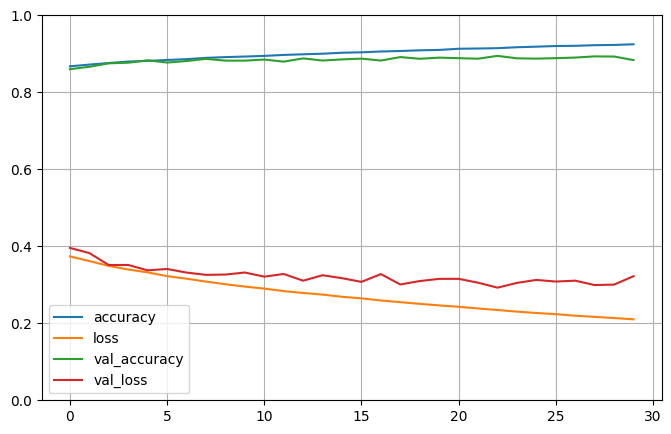

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()